In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Exploratory analysis of data

In [33]:
df_posts = pd.read_xml("../updated_database/posts.xml")

In [3]:
df_posts.shape

(308300, 22)

In [34]:
df_sorted = df_posts.sort_values('CreationDate')

In [35]:
df_sorted.head(2)

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,...,Tags,AnswerCount,CommentCount,FavoriteCount,ContentLicense,ParentId,LastEditorDisplayName,OwnerDisplayName,CommunityOwnedDate,ClosedDate
0,1,1,2.0,2015-10-29T15:56:52.933,33,520.0,<p>Estoy creando un servicio usando <em>ASP.NE...,23.0,13558.0,2019-07-07T21:36:17.737,...,<.net><asp.net-web-api><asp.net>,1.0,2,4.0,CC BY-SA 4.0,NaN,None,None,None,None
1,2,2,NaN,2015-10-29T19:14:23.673,26,NaN,<p>He encontrado la solución.</p>\n\n<p>Result...,23.0,NaN,None,...,None,NaN,2,NaN,CC BY-SA 3.0,1.0,None,None,None,None


In [36]:
df_sorted.tail(2)

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,...,Tags,AnswerCount,CommentCount,FavoriteCount,ContentLicense,ParentId,LastEditorDisplayName,OwnerDisplayName,CommunityOwnedDate,ClosedDate
308298,431641,1,NaN,2021-02-28T02:33:33.357,0,2.0,<p>Estoy tratando de crear un script en powers...,144334.0,NaN,None,...,<script><email><powershell><codificación><outl...,0.0,0,NaN,CC BY-SA 4.0,NaN,None,None,None,None
308299,431642,1,NaN,2021-02-28T02:50:40.080,0,3.0,<p>Estoy realizando un tabla maestro detalle ...,207109.0,NaN,None,...,<sql-server><stored-procedure>,0.0,0,NaN,CC BY-SA 4.0,NaN,None,None,None,None


In [7]:
questions = df_posts[data_posts['PostTypeId']==1]

In [8]:
len(questions)

145623

In [37]:
df_posts['PostTypeId'].value_counts()

2    159308
1    145623
5      1672
4      1672
6        23
7         2
Name: PostTypeId, dtype: int64

In [10]:
df_votes = pd.read_xml("../updated_database/votes.xml")

In [11]:
df_votes.head(1)

,Id,PostId,VoteTypeId,CreationDate,UserId,BountyAmount
0,1,1,2,2015-10-29T00:00:00.000,NaN,NaN


In [12]:
df_votes.shape

(628897, 6)

In [13]:
df_votes['VoteTypeId'].value_counts()

2     329266
3      95881
1      62007
10     47813
16     40618
15     24294
5      22758
11      3832
8       1169
9       1163
4         52
12        44
Name: VoteTypeId, dtype: int64

In [14]:
accepted = df_votes[df_votes['VoteTypeId']==2]

In [15]:
accepted.head(2)

,Id,PostId,VoteTypeId,CreationDate,UserId,BountyAmount
0,1,1,2,2015-10-29T00:00:00.000,NaN,NaN
1,2,2,2,2015-10-29T00:00:00.000,NaN,NaN


# Analysis of user's reputation over the years

In [16]:
df_users = pd.read_xml("../updated_database/users.xml")

In [539]:
len(df_users)

197836

In [540]:
df_users.head(1)

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,ProfileImageUrl
0,-1,1,2015-10-26T21:36:24.767,Comunidad,2015-10-26T21:36:24.767,NaN,en la granja de servidores,"<p>Hola, no soy una persona real.</p>\n\n<p>¡S...",251,9652,17781,-1.0,None


In [541]:
df_users['Reputation'].max()

91715

In [542]:
highest_reputation_index = df_users['Reputation'].idxmax()
highest_reputation_person = df_users.loc[highest_reputation_index]
print(highest_reputation_person)

Id                                                                95
Reputation                                                     91715
CreationDate                                 2015-12-01T16:53:09.890
DisplayName                                                 Jorgesys
LastAccessDate                               2021-02-27T23:14:52.843
WebsiteUrl                                 http://www.cplusplus.com/
Location                   Mexico City, CDMX, Mexico / Iași, Romania
AboutMe            <p><a href="/questions/tagged/java" class="pos...
Views                                                          13489
UpVotes                                                         8162
DownVotes                                                       2276
AccountId                                                    91056.0
ProfileImageUrl                                                 None
Name: 86, dtype: object


In [543]:
df_users['Reputation'].min()

1

In [544]:
df_users['Year'] = pd.to_datetime(df_users['CreationDate']).dt.year
df_users['Month'] = pd.to_datetime(df_users['CreationDate']).dt.month

In [545]:
df_users.head(2)

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,ProfileImageUrl,Year,Month
0,-1,1,2015-10-26T21:36:24.767,Comunidad,2015-10-26T21:36:24.767,NaN,en la granja de servidores,"<p>Hola, no soy una persona real.</p>\n\n<p>¡S...",251,9652,17781,-1.0,None,2015,10
1,1,101,2015-10-26T22:50:12.710,Geoff Dalgas,2021-01-05T19:45:26.807,http://stackoverflow.com,"Corvallis, OR",<p>Dev #2 who helped create Stack Overflow cur...,2883,0,0,2.0,https://i.stack.imgur.com/nDllk.png?s=128&g=1,2015,10


In [546]:
yearly_reputation = df_users.groupby('Year')['Reputation'].sum()

In [547]:
yearly_reputation

Year
2015     709408
2016    1659920
2017    1197281
2018     804617
2019     542802
2020     378907
2021      29855
Name: Reputation, dtype: int64

In [548]:
df_users_2015 = df_users[df_users['Year']==2015]
df_users_2016 = df_users[df_users['Year']==2016]
df_users_2017 = df_users[df_users['Year']==2017]
df_users_2018 = df_users[df_users['Year']==2018]
df_users_2019 = df_users[df_users['Year']==2019]
df_users_2020 = df_users[df_users['Year']==2020]
df_users_2021 = df_users[df_users['Year']==2021]

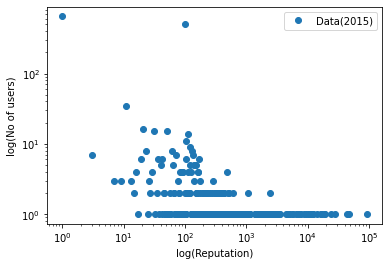

In [569]:
# Count the number of users for each reputation level
reputation_counts = df_users_2015['Reputation'].value_counts(sort=False).sort_index()

# Create a Pandas DataFrame with the reputation and count data
df = pd.DataFrame({'Reputation': reputation_counts.index, 'Count': reputation_counts.values})

# Calculate the logarithm of the data
df['log10_Reputation'] = np.array(df['Reputation'])
df['log10_Count'] = np.array(df['Count'])


# Plot the data and the fitted curve using Matplotlib
plt.plot(df['log10_Reputation'], df['log10_Count'], 'o', label='Data(2015)')

# set x and y labels
plt.xlabel('log(Reputation)')
plt.ylabel('log(No of users)')

plt.yscale('log')
plt.xscale('log')

plt.legend()
plt.show()

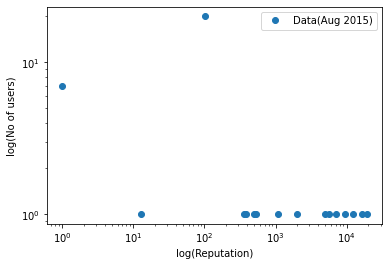

In [578]:
df_users_2015_10 = df_users_2015[df_users_2015['Month']==10]

# Count the number of users for each reputation level
reputation_counts = df_users_2015_10['Reputation'].value_counts(sort=False).sort_index()

# Create a Pandas DataFrame with the reputation and count data
df = pd.DataFrame({'Reputation': reputation_counts.index, 'Count': reputation_counts.values})

# Calculate the logarithm of the data
df['log10_Reputation'] = np.array(df['Reputation'])
df['log10_Count'] = np.array(df['Count'])


# Plot the data and the fitted curve using Matplotlib
plt.plot(df['log10_Reputation'], df['log10_Count'], 'o', label='Data(Aug 2015)')

# set x and y labels
plt.xlabel('log(Reputation)')
plt.ylabel('log(No of users)')

plt.yscale('log')
plt.xscale('log')

plt.legend()
plt.show()

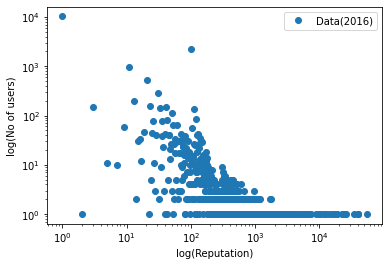

In [571]:
# Count the number of users for each reputation level
reputation_counts = df_users_2016['Reputation'].value_counts(sort=False).sort_index()

# Create a Pandas DataFrame with the reputation and count data
df = pd.DataFrame({'Reputation': reputation_counts.index, 'Count': reputation_counts.values})

# Calculate the logarithm of the data
df['log10_Reputation'] = np.array(df['Reputation'])
df['log10_Count'] = np.array(df['Count'])


# Plot the data and the fitted curve using Matplotlib
plt.plot(df['log10_Reputation'], df['log10_Count'], 'o', label='Data(2016)')

# set x and y labels
plt.xlabel('log(Reputation)')
plt.ylabel('log(No of users)')

plt.yscale('log')
plt.xscale('log')

plt.legend()
plt.show()

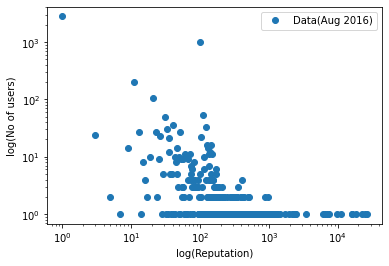

In [572]:
df_users_2016_10 = df_users_2016[df_users_2016['Month']==10]

# Count the number of users for each reputation level
reputation_counts = df_users_2016_10['Reputation'].value_counts(sort=False).sort_index()

# Create a Pandas DataFrame with the reputation and count data
df = pd.DataFrame({'Reputation': reputation_counts.index, 'Count': reputation_counts.values})

# Calculate the logarithm of the data
df['log10_Reputation'] = np.array(df['Reputation'])
df['log10_Count'] = np.array(df['Count'])


# Plot the data and the fitted curve using Matplotlib
plt.plot(df['log10_Reputation'], df['log10_Count'], 'o', label='Data(Aug 2016)')

# set x and y labels
plt.xlabel('log(Reputation)')
plt.ylabel('log(No of users)')

plt.yscale('log')
plt.xscale('log')

plt.legend()
plt.show()

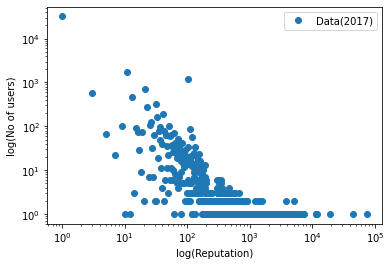

In [573]:
# Count the number of users for each reputation level
reputation_counts = df_users_2017['Reputation'].value_counts(sort=False).sort_index()

# Create a Pandas DataFrame with the reputation and count data
df = pd.DataFrame({'Reputation': reputation_counts.index, 'Count': reputation_counts.values})

# Calculate the logarithm of the data
df['log10_Reputation'] = np.array(df['Reputation'])
df['log10_Count'] = np.array(df['Count'])


# Plot the data and the fitted curve using Matplotlib
plt.plot(df['log10_Reputation'], df['log10_Count'], 'o', label='Data(2017)')

# set x and y labels
plt.xlabel('log(Reputation)')
plt.ylabel('log(No of users)')

plt.yscale('log')
plt.xscale('log')

plt.legend()
plt.show()

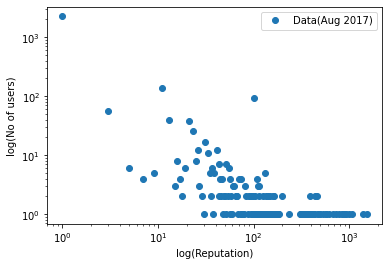

In [579]:
df_users_2017_10 = df_users_2017[df_users_2017['Month']==10]

# Count the number of users for each reputation level
reputation_counts = df_users_2017_10['Reputation'].value_counts(sort=False).sort_index()

# Create a Pandas DataFrame with the reputation and count data
df = pd.DataFrame({'Reputation': reputation_counts.index, 'Count': reputation_counts.values})

# Calculate the logarithm of the data
df['log10_Reputation'] = np.array(df['Reputation'])
df['log10_Count'] = np.array(df['Count'])


# Plot the data and the fitted curve using Matplotlib
plt.plot(df['log10_Reputation'], df['log10_Count'], 'o', label='Data(Aug 2017)')

# set x and y labels
plt.xlabel('log(Reputation)')
plt.ylabel('log(No of users)')

plt.yscale('log')
plt.xscale('log')

plt.legend()
plt.show()

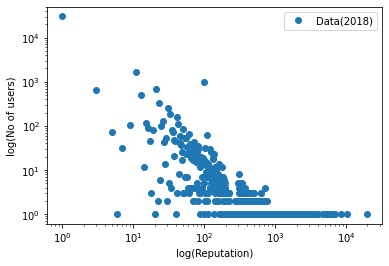

In [574]:
# Count the number of users for each reputation level
reputation_counts = df_users_2018['Reputation'].value_counts(sort=False).sort_index()

# Create a Pandas DataFrame with the reputation and count data
df = pd.DataFrame({'Reputation': reputation_counts.index, 'Count': reputation_counts.values})

# Calculate the logarithm of the data
df['log10_Reputation'] = np.array(df['Reputation'])
df['log10_Count'] = np.array(df['Count'])


# Plot the data and the fitted curve using Matplotlib
plt.plot(df['log10_Reputation'], df['log10_Count'], 'o', label='Data(2018)')

# set x and y labels
plt.xlabel('log(Reputation)')
plt.ylabel('log(No of users)')

plt.yscale('log')
plt.xscale('log')

plt.legend()
plt.show()

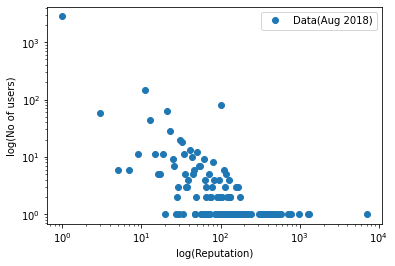

In [580]:
df_users_2018_10 = df_users_2018[df_users_2018['Month']==10]

# Count the number of users for each reputation level
reputation_counts = df_users_2018_10['Reputation'].value_counts(sort=False).sort_index()

# Create a Pandas DataFrame with the reputation and count data
df = pd.DataFrame({'Reputation': reputation_counts.index, 'Count': reputation_counts.values})

# Calculate the logarithm of the data
df['log10_Reputation'] = np.array(df['Reputation'])
df['log10_Count'] = np.array(df['Count'])


# Plot the data and the fitted curve using Matplotlib
plt.plot(df['log10_Reputation'], df['log10_Count'], 'o', label='Data(Aug 2018)')

# set x and y labels
plt.xlabel('log(Reputation)')
plt.ylabel('log(No of users)')

plt.yscale('log')
plt.xscale('log')

plt.legend()
plt.show()

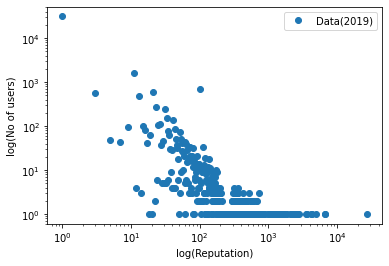

In [575]:
# Count the number of users for each reputation level
reputation_counts = df_users_2019['Reputation'].value_counts(sort=False).sort_index()

# Create a Pandas DataFrame with the reputation and count data
df = pd.DataFrame({'Reputation': reputation_counts.index, 'Count': reputation_counts.values})

# Calculate the logarithm of the data
df['log10_Reputation'] = np.array(df['Reputation'])
df['log10_Count'] = np.array(df['Count'])


# Plot the data and the fitted curve using Matplotlib
plt.plot(df['log10_Reputation'], df['log10_Count'], 'o', label='Data(2019)')

# set x and y labels
plt.xlabel('log(Reputation)')
plt.ylabel('log(No of users)')

plt.yscale('log')
plt.xscale('log')

plt.legend()
plt.show()

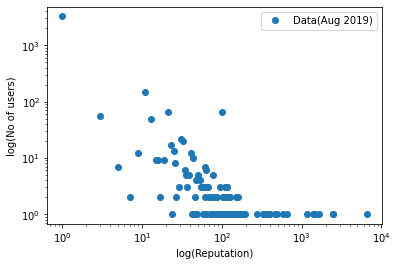

In [581]:
df_users_2019_10 = df_users_2019[df_users_2019['Month']==10]

# Count the number of users for each reputation level
reputation_counts = df_users_2019_10['Reputation'].value_counts(sort=False).sort_index()

# Create a Pandas DataFrame with the reputation and count data
df = pd.DataFrame({'Reputation': reputation_counts.index, 'Count': reputation_counts.values})

# Calculate the logarithm of the data
df['log10_Reputation'] = np.array(df['Reputation'])
df['log10_Count'] = np.array(df['Count'])


# Plot the data and the fitted curve using Matplotlib
plt.plot(df['log10_Reputation'], df['log10_Count'], 'o', label='Data(Aug 2019)')

# set x and y labels
plt.xlabel('log(Reputation)')
plt.ylabel('log(No of users)')

plt.yscale('log')
plt.xscale('log')

plt.legend()
plt.show()

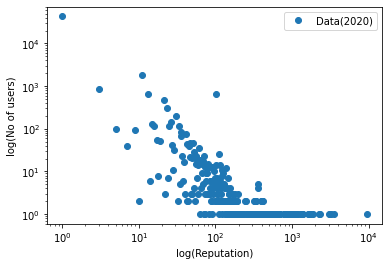

In [576]:
# Count the number of users for each reputation level
reputation_counts = df_users_2020['Reputation'].value_counts(sort=False).sort_index()

# Create a Pandas DataFrame with the reputation and count data
df = pd.DataFrame({'Reputation': reputation_counts.index, 'Count': reputation_counts.values})

# Calculate the logarithm of the data
df['log10_Reputation'] = np.array(df['Reputation'])
df['log10_Count'] = np.array(df['Count'])


# Plot the data and the fitted curve using Matplotlib
plt.plot(df['log10_Reputation'], df['log10_Count'], 'o', label='Data(2020)')

# set x and y labels
plt.xlabel('log(Reputation)')
plt.ylabel('log(No of users)')

plt.yscale('log')
plt.xscale('log')

plt.legend()
plt.show()

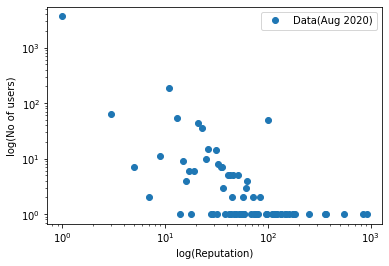

In [582]:
df_users_2020_10 = df_users_2020[df_users_2020['Month']==10]

# Count the number of users for each reputation level
reputation_counts = df_users_2020_10['Reputation'].value_counts(sort=False).sort_index()

# Create a Pandas DataFrame with the reputation and count data
df = pd.DataFrame({'Reputation': reputation_counts.index, 'Count': reputation_counts.values})

# Calculate the logarithm of the data
df['log10_Reputation'] = np.array(df['Reputation'])
df['log10_Count'] = np.array(df['Count'])


# Plot the data and the fitted curve using Matplotlib
plt.plot(df['log10_Reputation'], df['log10_Count'], 'o', label='Data(Aug 2020)')

# set x and y labels
plt.xlabel('log(Reputation)')
plt.ylabel('log(No of users)')

plt.yscale('log')
plt.xscale('log')

plt.legend()
plt.show()

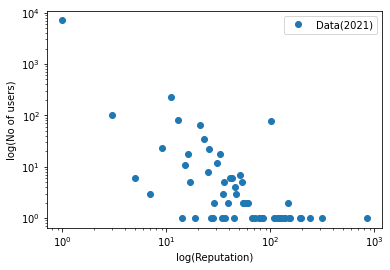

In [577]:
# Count the number of users for each reputation level
reputation_counts = df_users_2021['Reputation'].value_counts(sort=False).sort_index()

# Create a Pandas DataFrame with the reputation and count data
df = pd.DataFrame({'Reputation': reputation_counts.index, 'Count': reputation_counts.values})

# Calculate the logarithm of the data
df['log10_Reputation'] = np.array(df['Reputation'])
df['log10_Count'] = np.array(df['Count'])


# Plot the data and the fitted curve using Matplotlib
plt.plot(df['log10_Reputation'], df['log10_Count'], 'o', label='Data(2021)')

# set x and y labels
plt.xlabel('log(Reputation)')
plt.ylabel('log(No of users)')

plt.yscale('log')
plt.xscale('log')

plt.legend()
plt.show()

# Model

In [627]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from datetime import datetime


In [966]:
df_votes = pd.read_xml("../updated_database/votes.xml")

In [967]:
df_users = pd.read_xml("../updated_database/users.xml")

In [968]:
df_users['CreationDate'] = pd.to_datetime(df_users['CreationDate'])
df_users['years_on_so'] = (datetime.now() - df_users['CreationDate']) / pd.Timedelta(days=365)
df_users['years_on_so'] = round(df_users['years_on_so'], 2)

In [969]:
df_users.head(1)

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,ProfileImageUrl,years_on_so
0,-1,1,2015-10-26 21:36:24.767,Comunidad,2015-10-26T21:36:24.767,NaN,en la granja de servidores,"<p>Hola, no soy una persona real.</p>\n\n<p>¡S...",251,9652,17781,-1.0,None,7.44


In [970]:
# Filter out users who have been members for less than a year
df_users = df_users[df_users['years_on_so'] >= 1]

# Exclude users with a starting reputation of 1
df_users = df_users[df_users['Reputation'] != 1]

# Total answers

In [971]:
# Filter the table to include only answers
df_answers = df_posts[df_posts['PostTypeId'] == 2]

In [972]:
df_answers.shape

(159308, 22)

In [973]:

# Set the number of months to consider
N = 6

# Merge the df_users and df_answers dataframes on OwnerUserId
merged_df = pd.merge(df_users, df_answers, how='left', left_on='Id', right_on='OwnerUserId')

# Filter the merged dataframe to only include answers posted within the first N months of user's activity
merged_df = merged_df[(merged_df['CreationDate_x'] <= merged_df['CreationDate_y']) &
                      (merged_df['CreationDate_y'] <= merged_df['CreationDate_x'] + pd.DateOffset(months=N))]

# Group the merged dataframe by OwnerUserId and count the number of answers
answers_by_user = merged_df.groupby('Id_x')['Id_x'].count()
# Add the answers count as a new column in df_users

df_users['Answers'] = pd.Series(dtype='float64')
for i, value in answers_by_user.iteritems():
#     print(i, value)
    df_users.loc[df_users['Id'] == i, 'Answers'] = value
df_users['Answers'].fillna(0, inplace=True)

In [974]:
df_users['Answers'].value_counts()

0.0      30194
1.0       7351
2.0       2204
3.0       1097
4.0        598
         ...  
84.0         1
75.0         1
73.0         1
86.0         1
191.0        1
Name: Answers, Length: 141, dtype: int64

In [975]:
df_users[df_users['DisplayName']=='Leandro Tuttini']

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,ProfileImageUrl,years_on_so,Answers
1948,2600,34867,2016-01-07 02:45:33.523,Leandro Tuttini,2021-02-10T23:14:25.750,http://ltuttini.blogspot.com.ar/,Argentina,<p>Microsoft MVP C#</p>\n,4719,86,18,5219979.0,None,7.24,389.0


# Total Questions

In [976]:
df_question = df_posts[df_posts['PostTypeId'] == 1]

In [977]:
# Set the number of months to consider
N = 6

# Merge the df_users and df_questios dataframes on OwnerUserId
merged_df = pd.merge(df_users, df_question, how='left', left_on='Id', right_on='OwnerUserId')

# Filter the merged dataframe to only include questions posted within the first N months of user's activity
merged_df = merged_df[(merged_df['CreationDate_x'] <= merged_df['CreationDate_y']) &
                      (merged_df['CreationDate_y'] <= merged_df['CreationDate_x'] + pd.DateOffset(months=N))]

# Group the merged dataframe by OwnerUserId and count the number of answers
question_by_user = merged_df.groupby('OwnerUserId')['OwnerUserId'].count()

df_users['Questions'] = pd.Series(dtype='float64')
for i, value in question_by_user.iteritems():
#     print(i, value)
    df_users.loc[df_users['Id'] == i, 'Questions'] = value
df_users['Questions'].fillna(0, inplace=True)


# Total comments

In [1006]:
df_comments = pd.read_xml("../updated_database/comments.xml")

In [1007]:
# Merge the df_users and df_comments dataframes on UserId
merged_df = pd.merge(df_users, df_comments, how='left', left_on='Id', right_on='UserId')

# Group the merged dataframe by UserId and count the number of comments
comments_by_user = merged_df.groupby('UserId')['UserId'].count()

# Add the 'Comments' column to the df_users dataframe
df_users['Comments'] = pd.Series(dtype='float64')
for i, value in comments_by_user.iteritems():
    df_users.loc[df_users['Id'] == i, 'Comments'] = value

# Fill in any missing values with 0
df_users['Comments'].fillna(0, inplace=True)

In [1013]:
df_users['Comments'].value_counts()

0.0      17431
1.0       6788
2.0       4174
3.0       2775
4.0       1994
         ...  
509.0        1
482.0        1
273.0        1
261.0        1
148.0        1
Name: Comments, Length: 438, dtype: int64

In [1014]:
df_users[df_users['DisplayName']=='Leandro Tuttini']

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,ProfileImageUrl,years_on_so,Answers,Questions,category,Comments
1948,2600,34867,2016-01-07 02:45:33.523,Leandro Tuttini,2021-02-10T23:14:25.750,http://ltuttini.blogspot.com.ar/,Argentina,<p>Microsoft MVP C#</p>\n,4719,86,18,5219979.0,None,7.24,389.0,1.0,expert,2711.0


# Accepted Answers

In [978]:
# Merge the votes and posts data frames on post ID to get a data frame with
# all the votes for each post, along with information about the post
post_votes = pd.merge(df_votes, df_posts, left_on='PostId', right_on='Id')

post_votes - post_votes.dropna()
# Filter for rows where the vote is an upvote and the post is an accepted answer
accepted_answers = post_votes[(post_votes['VoteTypeId'] == 2) & (post_votes['PostTypeId'] == 2)]


# Group the accepted answers by user ID and count the number of answers for each user
user_answers = accepted_answers.groupby('OwnerUserId').size().reset_index(name='NumAnswers')

# Merge the user_answers and users data frames to get a data frame with user information
user_answer_counts = pd.merge(user_answers, df_users, left_on='OwnerUserId', right_on='Id')


In [979]:
# df_users = user_answer_counts

In [980]:
df_users[df_users['DisplayName']=='Leandro Tuttini']

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,ProfileImageUrl,years_on_so,Answers,Questions
1948,2600,34867,2016-01-07 02:45:33.523,Leandro Tuttini,2021-02-10T23:14:25.750,http://ltuttini.blogspot.com.ar/,Argentina,<p>Microsoft MVP C#</p>\n,4719,86,18,5219979.0,None,7.24,389.0,1.0


In [1023]:

# Define expert and non-expert categories based on reputation threshold
df_users['category'] = ['expert' if r >= 2400 else 'non-expert' for r in df_users['Reputation']]

# Sample users into training and testing sets
low_reputation_users = df_users[(df_users['Reputation'] > 1) & (df_users['Reputation'] < 400)].sample(frac=1/3)
mid_reputation_users = df_users[(df_users['Reputation'] >= 400) & (df_users['Reputation'] < 2400)].sample(frac=1/3)
high_reputation_users = df_users[df_users['Reputation'] >= 2400].sample(frac=1/3)

In [1024]:
df_users['category'].value_counts()

non-expert    43748
expert          201
Name: category, dtype: int64

# Training Model

In [1040]:
train_df = pd.concat([low_reputation_users, mid_reputation_users, high_reputation_users])
test_df = df_users.drop(train_df.index)

In [1041]:
train_df.head(2)

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,ProfileImageUrl,years_on_so,Answers,Questions,category,Comments
116474,129231,279,2019-05-18 16:37:17.487,Alex Valenzuela,2021-02-23T21:36:06.683,None,None,None,37,14,0,15965214.0,https://graph.facebook.com/3150294315010832/pi...,3.88,1.0,4.0,non-expert,42.0
165554,180830,13,2020-06-29 00:19:05.200,Camara Peña,2020-06-30T16:23:43.967,None,None,None,0,0,0,18954461.0,https://graph.facebook.com/1019216031869478/pi...,2.77,0.0,2.0,non-expert,2.0


In [1042]:
train_df[train_df['category']=='expert']

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,ProfileImageUrl,years_on_so,Answers,Questions,category,Comments
469,517,6977,2015-12-02 12:07:58.183,Jordi Castilla,2021-01-25T15:31:35.393,http://www.ibeernalia.com,Barcelona,<p>Beer and programming freak.</p>\n\n<p><a hr...,459,412,168,4763924.0,https://graph.facebook.com/100007829376909/pic...,7.34,25.0,23.0,expert,169.0
2186,2896,4387,2016-01-22 01:27:16.493,Pedro Miguel Pimienta Morales,2021-02-21T06:21:08.463,NaN,Colombia,<p>Ingeniero de sistema egresado de la univers...,679,468,8,6096203.0,https://lh5.googleusercontent.com/-pfnyEtqrofQ...,7.20,7.0,32.0,expert,582.0
98253,108737,5824,2018-11-28 12:22:37.040,Rubiales Alberto,2021-02-27T19:11:45.203,https://medium.com/@rubialesalberto,"Madrid, Spain",<p>Si consideráis que genero buen contenido ta...,498,2035,30,14840040.0,https://graph.facebook.com/1441874862613464/pi...,4.35,0.0,1.0,expert,495.0
20,20,12332,2015-10-28 21:24:53.730,Carlos Muñoz,2021-02-27T02:14:33.617,http://stackoverflow.com/users/186133/carlos-muoz,"Lima, Peru",<p>Ex IBMer.</p>\n\n<p>Now in the web developm...,1818,469,496,62733.0,None,7.44,83.0,1.0,expert,655.0
29311,35772,2773,2017-04-05 21:35:34.650,Jorge Arturo Juarez,2018-10-16T10:04:45.237,NaN,"Guanajuato, México",<p>Usuario promedio de internet</p>\n,245,70,27,6473935.0,https://graph.facebook.com/10205423757766434/p...,6.00,115.0,5.0,expert,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45400,54039,11526,2017-07-27 02:20:51.963,Triby,2021-02-26T23:08:49.633,None,None,None,813,746,8,2805579.0,https://i.stack.imgur.com/ZfNwa.jpg,5.69,25.0,0.0,expert,2255.0
711,822,11507,2015-12-06 03:00:50.200,fredyfx,2021-02-27T20:59:52.797,http://www.fredyfx.com,"Trujillo, La Libertad, Peru","<p>Hola buenas madrugadas, mi nombre es <stron...",2426,1554,375,4438214.0,None,7.33,28.0,2.0,expert,3198.0
25,25,16407,2015-10-29 17:32:30.253,rnrneverdies,2021-02-27T21:27:46.870,None,Argentina,<p>Nothing in the world is a gift. Whatever th...,1386,689,110,3035018.0,None,7.43,136.0,12.0,expert,892.0
10519,16108,15890,2016-10-10 20:54:30.177,Francisco Romero,2021-02-26T23:19:09.103,NaN,"Zaragoza, España",<p>Apasionado de la informática en general y d...,1786,500,238,5786247.0,https://i.stack.imgur.com/jTpxN.png?s=128&g=1,6.48,211.0,7.0,expert,1314.0


In [1043]:
# Extract features from user activity
# features = ['Answers', 'Questions', 'Accepted']
features = ['Answers', 'Questions', 'Comments']
X_train = train_df[features]
y_train = train_df['category']
X_test = test_df[features]
y_test = test_df['category']

# Train Random Forest model with 100 estimators
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [1044]:
# Evaluate model on testing set
y_pred = model.predict(X_test)

# Get probability estimates for the test set
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy:', accuracy)

Model accuracy: 0.9975085324232081


In [1045]:
from sklearn.metrics import classification_report

# Evaluate model on testing set
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

      expert       0.77      0.65      0.70       134
  non-expert       1.00      1.00      1.00     29166

    accuracy                           1.00     29300
   macro avg       0.88      0.82      0.85     29300
weighted avg       1.00      1.00      1.00     29300



# Graph

In [1046]:
from sklearn.preprocessing import LabelEncoder

# encode labels to numerical values
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Get probability estimates for the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)


In [1047]:
# Get probability estimates for the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label='expert')
roc_auc = auc(fpr, tpr)

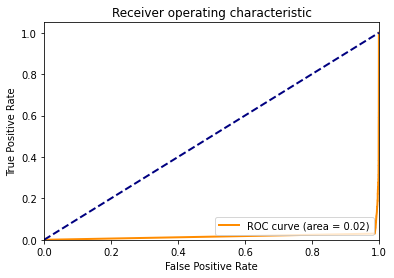

In [1048]:
# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

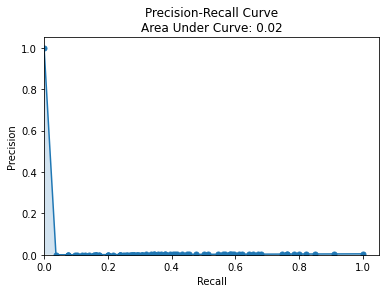

In [1039]:
from sklearn.metrics import precision_recall_curve, auc

# Get predicted probabilities and calculate precision-recall values
y_prob = model.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_prob, pos_label='expert')

# Calculate area under the curve
area = auc(recall, precision)

# Plot the precision-recall curve and show the area
plt.plot(recall, precision, marker='.', markersize=10)
plt.fill_between(recall, precision, alpha=0.2)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve\nArea Under Curve: {:.2f}'.format(area))
plt.show()
